<a href="https://colab.research.google.com/github/afreenkhan0808/aichallenge/blob/main/Customer_Service_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install ipython-autotime

%load_ext autotime

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
time: 801 µs (started: 2024-10-04 20:52:03 +00:00)


In [6]:
from google.colab import files
uploaded = files.upload()

Saving Airline_customer_satisfaction.csv to Airline_customer_satisfaction (1).csv
time: 3min 3s (started: 2024-10-04 20:52:06 +00:00)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import the machine learning models you might use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from google.colab import drive

time: 501 ms (started: 2024-10-04 20:55:20 +00:00)


In [8]:
data = pd.read_csv('Airline_customer_satisfaction.csv',header='infer')


time: 343 ms (started: 2024-10-04 20:55:23 +00:00)


<ipython-input-9-6b3c7b8c1a50>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = target_group['satisfaction'],y = target_group[0],palette=np.array(pal[::-1])[rank] )
<ipython-input-9-6b3c7b8c1a50>:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g = sns.barplot(x = target_group['satisfaction'],y = target_group[0],palette=np.array(pal[::-1])[rank] )
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

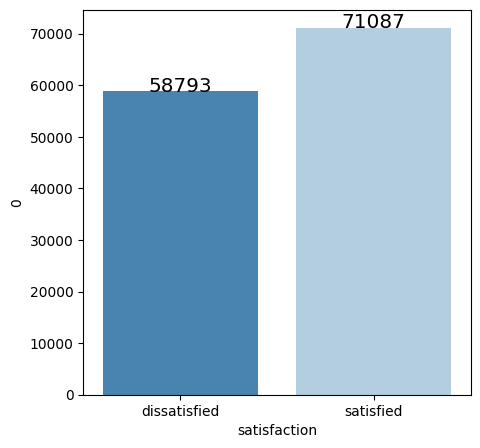

time: 429 ms (started: 2024-10-04 20:55:25 +00:00)


In [9]:
#Calculating Satisfied and Dissatisfied cases
plt.figure(figsize=(5,5))
target_group = data.groupby('satisfaction').size().reset_index()
pal = sns.color_palette("Blues", len(target_group))
rank = target_group["satisfaction"].argsort().argsort()
g = sns.barplot(x = target_group['satisfaction'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['satisfaction'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

In [10]:
data.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


time: 27.9 ms (started: 2024-10-04 20:55:33 +00:00)


In [11]:
columns_to_drop = ['Age']
data = data.drop(columns_to_drop,axis=1)
data.head()

,satisfaction,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,Personal Travel,Eco,265,0,0,0,2,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,Personal Travel,Business,2464,0,0,0,3,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,Personal Travel,Eco,2138,0,0,0,3,2,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,Personal Travel,Eco,623,0,0,0,3,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,Personal Travel,Eco,354,0,0,0,3,4,...,4,2,2,0,2,4,2,5,0,0.0


time: 27.6 ms (started: 2024-10-04 20:55:36 +00:00)


In [12]:
data.dtypes

,0
satisfaction,object
Customer Type,object
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64
Inflight wifi service,int64


time: 11.4 ms (started: 2024-10-04 20:55:44 +00:00)


In [13]:
# Count occurrences of zeros in each column
zero_counts = (data == 0).sum()
print(zero_counts)


satisfaction                             0
Customer Type                            0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Seat comfort                          4797
Departure/Arrival time convenient     6664
Food and drink                        5945
Gate location                            2
Inflight wifi service                  132
Inflight entertainment                2978
Online support                           1
Ease of Online booking                  18
On-board service                         5
Leg room service                       444
Baggage handling                         0
Checkin service                          1
Cleanliness                              5
Online boarding                         14
Departure Delay in Minutes           73356
Arrival Delay in Minutes             72753
dtype: int64
time: 56.8 ms (started: 2024-10-04 20:55:44 +00:00)


In [14]:
data.isna().sum()

,0
satisfaction,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0
Inflight wifi service,0


time: 43.6 ms (started: 2024-10-04 20:55:47 +00:00)


In [15]:
data['Seat comfort'] = data['Seat comfort'].fillna(data['Seat comfort'].median())
data['Inflight wifi service'] = data['Inflight wifi service'].fillna(data['Inflight wifi service'].median())
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median())


time: 11.9 ms (started: 2024-10-04 20:55:48 +00:00)


In [16]:
# Numerical columns from dataset
numerical_cols = ['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
                  'Food and drink', 'Inflight wifi service', 'Inflight entertainment',
                  'Online support', 'Ease of Online booking', 'On-board service',
                  'Leg room service', 'Baggage handling', 'Checkin service',
                  'Cleanliness', 'Online boarding', 'Departure Delay in Minutes',
                  'Arrival Delay in Minutes']

# Categorical columns from dataset
categorical_cols = ['satisfaction', 'Customer Type', 'Type of Travel', 'Class']


time: 769 µs (started: 2024-10-04 20:55:49 +00:00)


In [17]:
# Perform one-hot encoding on categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Display the encoded DataFrame
print(data_encoded.head())

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  Gate location  Inflight wifi service  \
0               0              2                      2   
1               0              3                      0   
2               0              3                      2   
3               0              3                      3   
4               0              3                      4   

   Inflight entertainment  Online support  Ease of Online booking  \
0                       4               2                       3   
1                       2               2                       3   
2          

In [18]:
data_encoded.dtypes

,0
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64
Inflight wifi service,int64
Inflight entertainment,int64
Online support,int64
Ease of Online booking,int64
On-board service,int64


time: 12.6 ms (started: 2024-10-04 20:55:54 +00:00)


In [19]:
# Convert boolean columns to integers (0 and 1)
data_encoded = data_encoded.astype(int)
print(data_encoded.dtypes)

Flight Distance                      int64
Seat comfort                         int64
Departure/Arrival time convenient    int64
Food and drink                       int64
Gate location                        int64
Inflight wifi service                int64
Inflight entertainment               int64
Online support                       int64
Ease of Online booking               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Cleanliness                          int64
Online boarding                      int64
Departure Delay in Minutes           int64
Arrival Delay in Minutes             int64
satisfaction_dissatisfied            int64
satisfaction_satisfied               int64
Customer Type_Loyal Customer         int64
Customer Type_disloyal Customer      int64
Type of Travel_Business travel       int64
Type of Travel_Personal Travel       int64
Class_Busin

In [20]:
data.shape

(129880, 21)

time: 3.15 ms (started: 2024-10-04 20:55:57 +00:00)


In [22]:
# Target (satisfaction column - choose one, satisfied or dissatisfied)
y = data_encoded['satisfaction_satisfied']  # or 'satisfaction_dissatisfied'

# Check the distribution of target classes
print(y.value_counts(normalize=True))  # This will show the class balance as percentages


satisfaction_satisfied
1    0.547328
0    0.452672
Name: proportion, dtype: float64
time: 17.2 ms (started: 2024-10-04 20:57:11 +00:00)


In [23]:
from sklearn.model_selection import train_test_split

# Features (all columns except satisfaction)
X = data_encoded.drop(['satisfaction_satisfied', 'satisfaction_dissatisfied'], axis=1)

# Target (whether customer is satisfied or dissatisfied)
y = data_encoded['satisfaction_satisfied']  # or 'satisfaction_dissatisfied'

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(103904, 24) (25976, 24) (103904,) (25976,)
time: 246 ms (started: 2024-10-04 20:57:38 +00:00)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.9556513704958424
Confusion Matrix:
[[11209   466]
 [  686 13615]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.95      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

time: 17.3 s (started: 2024-10-04 20:58:20 +00:00)


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for tuning
param_dist = {
    'n_estimators': [100, 200, 300],   # Reduced number of trees
    'max_depth': [10, 20, 30],         # Fewer maximum depths
    'min_samples_split': [2, 5],       # Minimum samples to split a node
    'min_samples_leaf': [1, 2],        # Minimum samples to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider for the best split
}

# Initialize RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with fewer iterations and cross-validation folds
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=5,  # Reduced to 5 iterations for fewer parameter sets
    cv=3,      # Reduced cross-validation folds to 3
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Best hyperparameters found
print(f'Best Hyperparameters: {random_search.best_params_}')

# Best estimator
best_rf_model = random_search.best_estimator_



Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
time: 2min 25s (started: 2024-10-04 21:09:47 +00:00)


In [28]:
# Retrain the best model on the entire training data
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_rf_model.predict(X_test)

# Check accuracy and classification report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.9560748383122882
Confusion Matrix:
[[11218   457]
 [  684 13617]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

time: 50.3 s (started: 2024-10-04 21:13:36 +00:00)


In [29]:
import joblib

# Save the model to a file
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# To load the model later
# best_rf_model = joblib.load('best_rf_model.pkl')


['best_rf_model.pkl']

time: 2.95 s (started: 2024-10-04 21:15:02 +00:00)


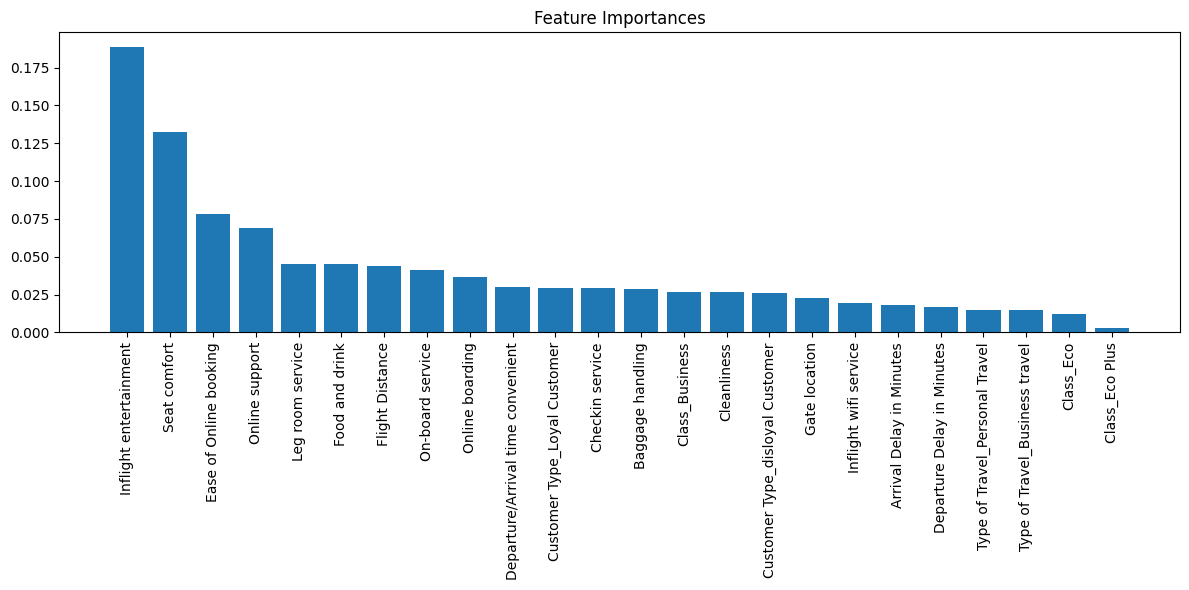

time: 1.32 s (started: 2024-10-04 21:16:40 +00:00)


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Plot feature importances
indices = np.argsort(importances)[::-1]  # Sort by importance
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()
